In this project, you are going to work on the "Restaurant revenue" dataset which
contains 100 observations of restaurants with 8 attributes.

### Problem Statement:

Create a machine learning model to predict revenue of the restaurant based on
the features present in the dataset.

Dataset Attributes:
    
1. ID - Restaurant ID

2. Name - Name of the Restaurant

3. Franchise - Restaurant has franchise or not

4. Category - specific type of category provided by restaurant

5. No_of_item - Different types of items provided by restaurant

6. Order_Placed - Order placed by customer to restaurant (in lacs)

7. Revenue - Total amount of income generated by the restaurant

### Tasks To Be Performed:
In this project, you have to predict the restaurant revenue based on the
independent features using a machine learning algorithm of your own choice.

## 1. Importing The Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Dataset and display the first few rows

df = pd.read_csv('revenue_prediction.csv')
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [3]:
# Check for the missing values

print(df.isnull().sum())

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64


In [5]:
# Summary Statistics
df.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


In [7]:
# display datatypes of the columns
df.dtypes

Id                int64
Name             object
Franchise        object
Category         object
City             object
No_Of_Item        int64
Order_Placed    float64
Revenue           int64
dtype: object

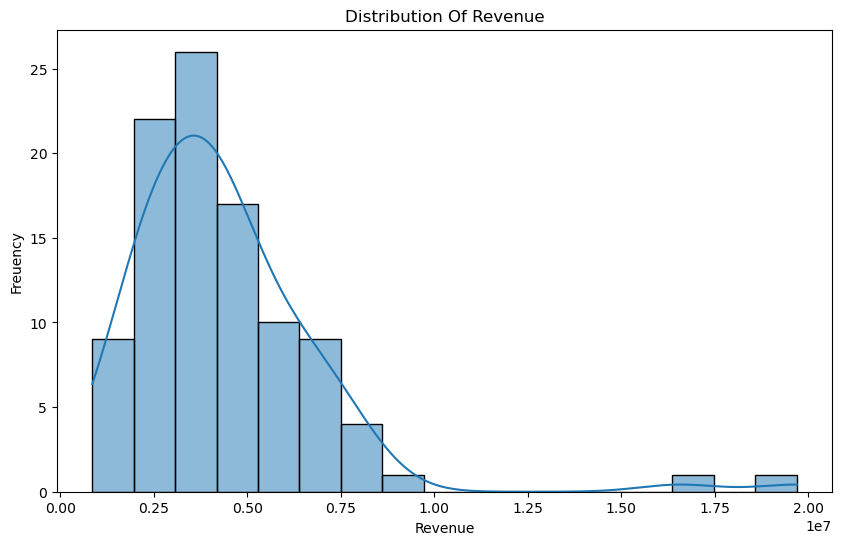

In [8]:
# Visulize the Distribution of the target variable ' Revenue '.
plt.figure(figsize=(10,6))
sns.histplot(df["Revenue"], kde=True)
plt.title('Distribution Of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Freuency')
plt.show()

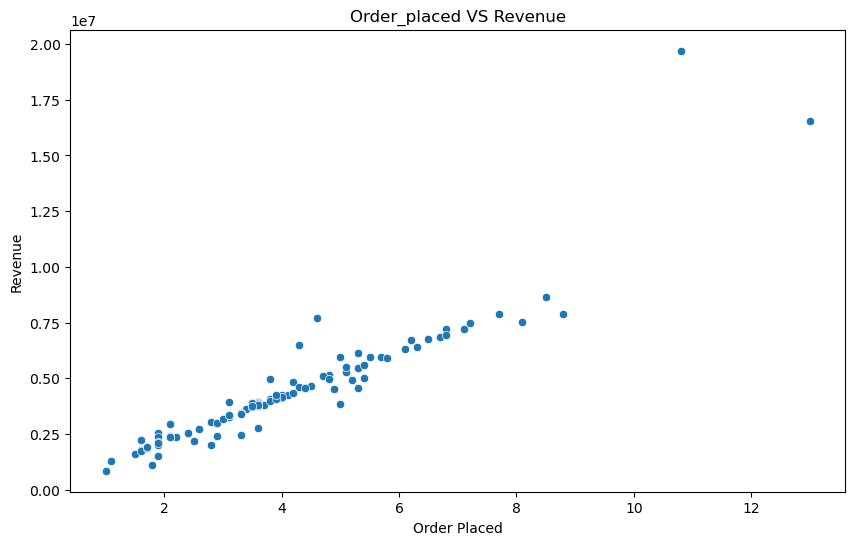

In [11]:
# Visualize the relationship between Numerical features and the target variable

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Order_Placed', y='Revenue')
plt.title('Order_placed VS Revenue')
plt.xlabel('Order Placed')
plt.ylabel('Revenue')
plt.show()

In [12]:
#Encode Categorical Variables

df['Franchise'] = df['Franchise'].map({'Yes': 1, 'No': 0})

In [15]:
# Use 'LabelEncoder' for names and 'Category' columns

from sklearn.preprocessing import LabelEncoder


le_name = LabelEncoder()
df['Name'] = le_name.fit_transform(df['Name'])

le_category = LabelEncoder()
df['Category'] = le_category.fit_transform(df['Category'])

In [17]:
# Ensure all the columns are numeric
df.dtypes

Id                int64
Name              int64
Franchise         int64
Category          int64
City             object
No_Of_Item        int64
Order_Placed    float64
Revenue           int64
dtype: object

In [18]:
# Drop the column that are not needed for prediction

df.drop(columns = ['Id'])

,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,40,1,12,Bengaluru,55,5.5,5953753
1,14,0,19,Gurugram,72,6.8,7223131
2,16,1,5,Pune,25,1.9,2555379
3,60,1,11,Mumbai,18,2.5,2175511
4,68,1,13,Noida,48,4.2,4816715
...,...,...,...,...,...,...,...
95,96,0,11,Bengaluru,19,1.1,1270499
96,47,1,19,Bengaluru,75,6.3,6412623
97,35,1,19,Gurugram,77,6.2,6694797
98,41,1,17,Pune,25,2.1,2344689


In [19]:
# Separate Features and Target Variables

X = df.drop(columns=['Revenue'])
y = df['Revenue']

In [20]:
# check if any columns are non-numeric

print(X.select_dtypes(include=['object']).columns)

Index(['City'], dtype='object')


In [21]:
# Encode any non-numeric columns

X = pd.get_dummies(X)

In [22]:
# split the dataset into training and testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standardize the feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# Initialize the model

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [26]:
# fir the model on training set

model.fit(X_train, y_train)

LinearRegression()

In [27]:
# predict on X_test

y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE = mean_squared_error(y_test, y_pred)
# MSE

227887324471.46637

In [29]:
# RMSE = np.sqrt(MSE)
# RMSE

477375.4544082324

In [31]:
RMSE = mean_squared_error(y_test, y_pred, squared=False) # squared=False - calculates the square root of a number

RMSE

477375.4544082324

In [32]:
# Calculate the r2_score

r2_score_ = r2_score(y_test, y_pred)
r2_score_

0.8443665438021034

In [33]:
# Compare Actual vs Predicted Values

results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(results)

     Actual     Predicted
83  5966193  6.426633e+06
53  5595267  5.687971e+06
70  3982767  3.843886e+06
45  3752885  4.301555e+06
44  4264176  4.440463e+06
39  3818055  3.563179e+06
22  4956086  4.009509e+06
80  3727364  3.606830e+06
10  3945135  4.145053e+06
0   5953753  6.696723e+06
18  4937526  5.691781e+06
30  2408199  3.141811e+06
73  3347767  2.988312e+06
33  2371202  1.799444e+06
90  3426169  3.664029e+06
4   4816715  4.581352e+06
76  4590423  5.235008e+06
77  1904842  1.485903e+06
12  2234634  1.864392e+06
31  2358644  2.236087e+06


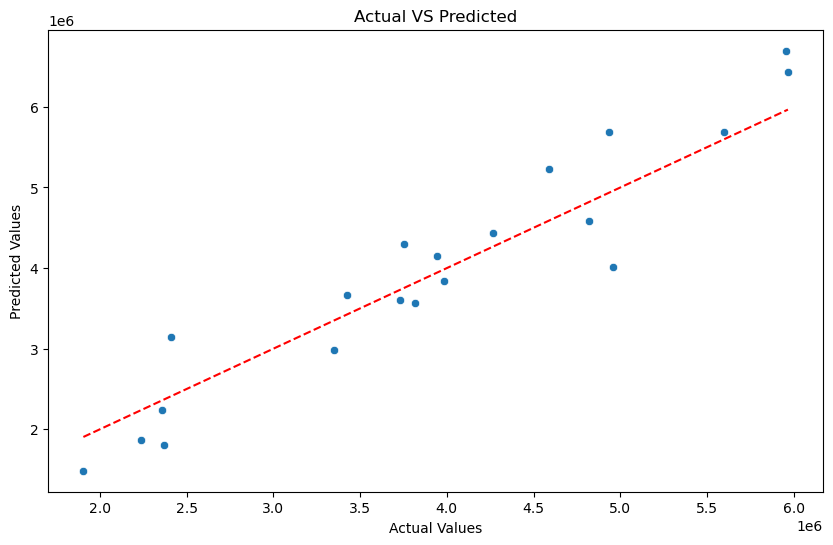

In [35]:
# plot the Actual vs Predicted Values

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test, y = y_pred)
plt.title("Actual VS Predicted")
plt.xlabel('Actual Values')
plt.ylabel("Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()